In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,0.857143,1.000000,1.000000,1.000000,0.714286,1.000000
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.600000,0.857143,0.833333,0.833333,0.833333,0.833333
0,1.000000,0.833333,1.000000,1.000000,1.000000,0.600000
0,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000
0,1.000000,1.000000,0.833333,0.833333,1.000000,0.666667
0,1.000000,0.833333,1.000000,1.000000,1.000000,0.833333


In [5]:
length_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,3.487844,2.636710,2.177310,1.940167,61.972947,1.969753
0,2.941778,2.017357,1.936781,1.779909,6.985544,1.880186
0,12.391574,2.587527,3.010438,2.931964,5.372065,1.941336
0,3.248262,2.134583,1.973463,1.611286,53.344593,1.639246
0,6.494808,9.949693,1.840947,2.263053,3.958454,1.613320
0,4.162032,2.422133,1.618217,4.564575,3.389928,1.643430
0,2.560511,2.965163,2.176323,2.639380,14.725386,1.823564
0,24.132292,2.175413,2.374105,1.887282,6.864575,1.828851
0,3.302438,2.061619,1.893271,1.771685,5.253998,1.724238
0,16.223081,1.889796,1.584293,1.530496,9.224048,1.680927


In [6]:
MSE_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,4.851194,5.385438,6.062667,6.550993,4.774639,4.774639
0,5.222046,6.118484,6.177021,5.756774,5.088702,5.088702
0,4.386405,4.462032,5.415203,6.438285,4.229402,4.229402
0,4.416286,4.390670,4.650772,4.643984,4.358789,4.358789
0,4.691813,5.627897,6.061654,6.225839,5.704158,5.704158
0,5.577067,5.824464,6.448618,6.322229,4.910281,4.910281
0,5.355777,5.660878,5.692906,5.154877,4.739299,4.739299
0,4.012201,3.893411,4.128905,4.787201,3.826694,3.826694
0,4.945903,4.767788,4.927773,5.277374,4.813250,4.813250
0,5.888392,6.408304,5.686134,7.042565,5.142412,5.142412


In [7]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)         0.912381
RRT(2.5)       0.952381
RRT(5)         0.966667
RRT(10)        0.966667
Tree-values    0.954762
Naive          0.879048
dtype: float64
Length :
 RRT(1)          7.894462
RRT(2.5)        3.083999
RRT(5)          2.058515
RRT(10)         2.291980
Tree-values    17.109154
Naive           1.774485
dtype: float64
MSE :
 RRT(1)         4.934708
RRT(2.5)       5.253937
RRT(5)         5.525165
RRT(10)        5.820012
Tree-values    4.758763
Naive          4.758763
dtype: float64


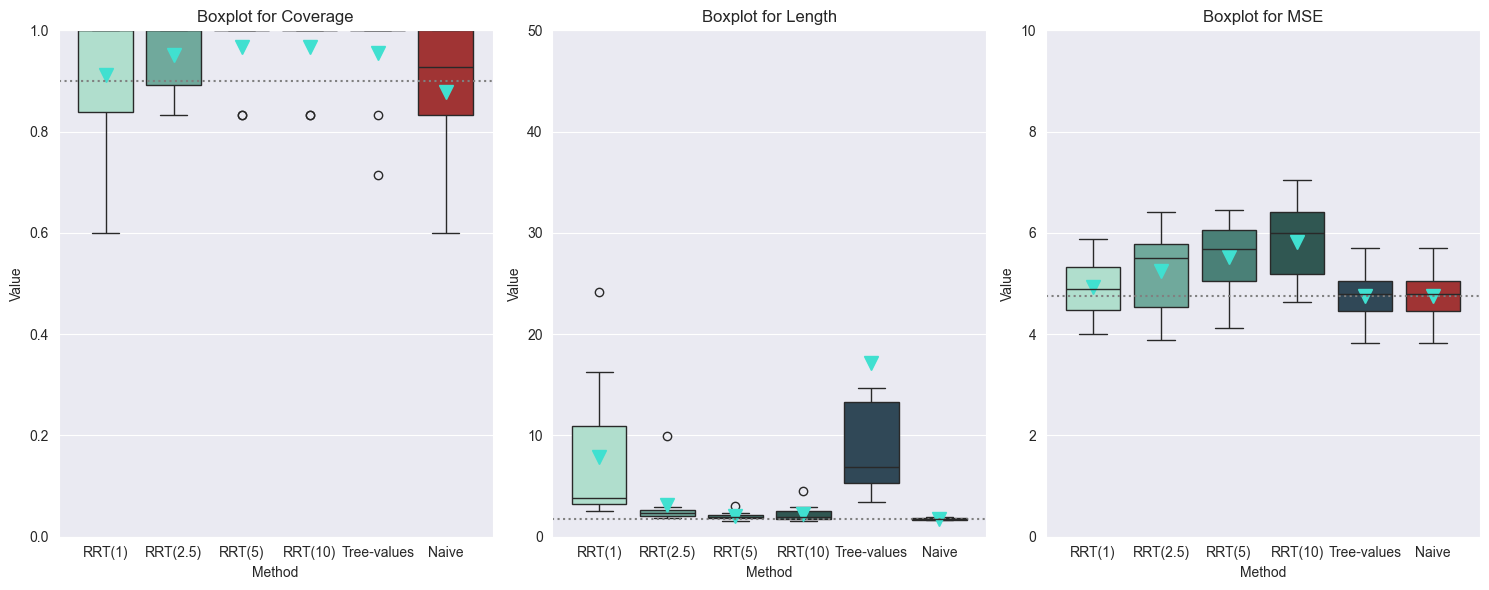

In [8]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=50,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values", "Naive"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#B22222"])

In [24]:
# TODO: Case 1 with 1, 5, 10